In [1333]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import os

In [225]:
class ImagesDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.img_names = os.listdir(root_dir)
        
    def __getitem__(self, index):
        img = Image.open(self.root_dir + '/' + self.img_names[index]).convert('L')
        item = transforms.ToTensor()(img)
        img.close()
        return item.view(1, 64, 64)

    def __len__(self):
        return 100#len(self.img_names)

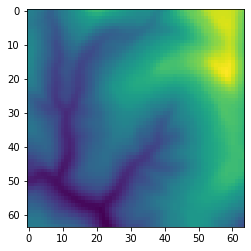

In [226]:
import matplotlib.pyplot as plt

dataset = ImagesDataset('./data')
plt.imshow(dataset[400].view(64, 64))
plt.show()

In [227]:
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

In [1666]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder specification
        self.enc_cnn_1 = nn.Conv2d(1, 128, 3, padding=1)
        self.enc_cnn_2 = nn.Conv2d(128, 64, 3, padding=1)
        self.enc_cnn_3 = nn.Conv2d(64, 4, 3, padding=1)
        
        # Decoder specification
        self.dec_cnn_1 = nn.ConvTranspose2d(4, 64, 3, stride=1, padding=1)
        self.dec_cnn_2 = nn.ConvTranspose2d(64, 128, 3, stride=1, padding=1)
        self.dec_cnn_3 = nn.ConvTranspose2d(128, 1, 3, stride=1, padding=1)
        
    def encode(self, data):
        code = self.enc_cnn_1(data)
        code = F.relu(F.max_pool2d(code, 2))
        
        code = self.enc_cnn_2(code)
        code = F.relu(F.max_pool2d(code, 2))
        
        code = self.enc_cnn_3(code)
        code = F.relu(F.max_pool2d(code, 2))
        return code
    
    def decode(self, code):
        out = F.interpolate(code, 16)
        out = F.relu(self.dec_cnn_1(out))
        
        out = F.interpolate(out, 32)
        out = F.relu(self.dec_cnn_2(out))
        
        out = F.interpolate(out, 64)
        out = torch.sigmoid(self.dec_cnn_3(out))
        return out
        
    def forward(self, data):
        code = self.encode(data)
        out = self.decode(code)
        return out

In [1667]:
net = Autoencoder().cuda()

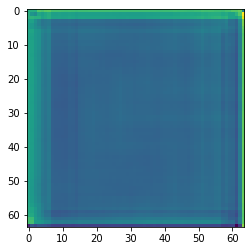

In [1668]:
x = dataset[400].cuda()
out = net(x.view(1, 1, 64, 64))
plt.imshow(out.view(64, 64).cpu().detach().numpy())
plt.show()

In [1669]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 10000

for epoch in range(epochs):
    for data in dataloader:
        net.zero_grad()
        x = data.cuda()
        output = net(x)
        loss = nn.MSELoss()(output, x)
        loss.backward()
        optimizer.step()
    print('epoch=' + str(epoch + 1) + ', loss=' + str(loss))

epoch=1, loss=tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2, loss=tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3, loss=tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4, loss=tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5, loss=tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6, loss=tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7, loss=tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8, loss=tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9, loss=tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=10, loss=tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=11, loss=tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=12, loss=tensor(0.0060, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=13, loss=tensor(0.0054, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=14, loss=tensor(0.0052, device='cuda:0', 

epoch=112, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=113, loss=tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=114, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=115, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=116, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=117, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=118, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=119, loss=tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=120, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=121, loss=tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=122, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=123, loss=tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=124, loss=tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=125, loss=tensor(0.

epoch=224, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=225, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=226, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=227, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=228, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=229, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=230, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=231, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=232, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=233, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=234, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=235, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=236, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=237, loss=tensor(0.

epoch=336, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=337, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=338, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=339, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=340, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=341, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=342, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=343, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=344, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=345, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=346, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=347, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=348, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=349, loss=tensor(0.

epoch=446, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=447, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=448, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=449, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=450, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=451, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=452, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=453, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=454, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=455, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=456, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=457, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=458, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=459, loss=tensor(0.

epoch=556, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=557, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=558, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=559, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=560, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=561, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=562, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=563, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=564, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=565, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=566, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=567, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=568, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=569, loss=tensor(0.

epoch=667, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=668, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=669, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=670, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=671, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=672, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=673, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=674, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=675, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=676, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=677, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=678, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=679, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=680, loss=tensor(0.

epoch=779, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=780, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=781, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=782, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=783, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=784, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=785, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=786, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=787, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=788, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=789, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=790, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=791, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=792, loss=tensor(0.

epoch=888, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=889, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=890, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=891, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=892, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=893, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=894, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=895, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=896, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=897, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=898, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=899, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=900, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=901, loss=tensor(0.

epoch=999, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1000, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1001, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1002, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1003, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1004, loss=tensor(9.1099e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1005, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1006, loss=tensor(8.7154e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1007, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1008, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1009, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1010, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1011, loss=tensor(9.1142e-05, device='cuda:0', grad_fn=<MseLossBackward>)
e

epoch=1108, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1109, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1110, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1111, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1112, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1113, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1114, loss=tensor(9.3931e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1115, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1116, loss=tensor(8.4692e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1117, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1118, loss=tensor(9.8786e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1119, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1120, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)


epoch=1215, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1216, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1217, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1218, loss=tensor(9.9634e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1219, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1220, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1221, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1222, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1223, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1224, loss=tensor(9.5735e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1225, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1226, loss=tensor(8.3861e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1227, loss=tensor(8.9594e-05, device='cuda:0', grad_fn=<MseLossBackwar

epoch=1322, loss=tensor(9.6218e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1323, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1324, loss=tensor(8.4744e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1325, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1326, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1327, loss=tensor(8.3886e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1328, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1329, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1330, loss=tensor(8.0462e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1331, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1332, loss=tensor(8.7867e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1333, loss=tensor(8.4782e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1334, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLos

epoch=1428, loss=tensor(7.5524e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1429, loss=tensor(8.0615e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1430, loss=tensor(7.3958e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1431, loss=tensor(9.1378e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1432, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1433, loss=tensor(9.1396e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1434, loss=tensor(8.7164e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1435, loss=tensor(9.7038e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1436, loss=tensor(8.4118e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1437, loss=tensor(8.0868e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1438, loss=tensor(7.2004e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1439, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1440, loss=tensor(8.1527e-05, device='cuda

epoch=1534, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1535, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1536, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1537, loss=tensor(9.4604e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1538, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1539, loss=tensor(7.9199e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1540, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1541, loss=tensor(8.0183e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1542, loss=tensor(9.6447e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1543, loss=tensor(9.9266e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1544, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1545, loss=tensor(9.7883e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1546, loss=tensor(6.8876e-05, device='cuda:0', grad_fn=<Ms

epoch=1640, loss=tensor(9.4984e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1641, loss=tensor(7.2763e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1642, loss=tensor(8.1395e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1643, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1644, loss=tensor(8.2911e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1645, loss=tensor(7.2045e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1646, loss=tensor(8.3426e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1647, loss=tensor(6.9065e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1648, loss=tensor(7.4115e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1649, loss=tensor(8.4447e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1650, loss=tensor(6.6460e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1651, loss=tensor(7.4856e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1652, loss=tensor(7.2187e-05, device='

epoch=1744, loss=tensor(7.4985e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1745, loss=tensor(6.8710e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1746, loss=tensor(6.7249e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1747, loss=tensor(7.4139e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1748, loss=tensor(7.3136e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1749, loss=tensor(6.1402e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1750, loss=tensor(9.9684e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1751, loss=tensor(7.9410e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1752, loss=tensor(6.6975e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1753, loss=tensor(7.6725e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1754, loss=tensor(7.2636e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1755, loss=tensor(6.7767e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1756, loss=tensor(8.0339e-05, devi

epoch=1849, loss=tensor(8.6755e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1850, loss=tensor(7.8560e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1851, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1852, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1853, loss=tensor(7.1392e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1854, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1855, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1856, loss=tensor(8.7962e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1857, loss=tensor(9.4434e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1858, loss=tensor(6.9330e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1859, loss=tensor(6.9840e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1860, loss=tensor(8.2362e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1861, loss=tensor(7.1948e-05, device='cuda:0', gra

epoch=1954, loss=tensor(6.6872e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1955, loss=tensor(6.4459e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1956, loss=tensor(6.6582e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1957, loss=tensor(6.2497e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1958, loss=tensor(6.2865e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1959, loss=tensor(6.4270e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1960, loss=tensor(7.8166e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1961, loss=tensor(8.2588e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1962, loss=tensor(6.7504e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1963, loss=tensor(6.2748e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1964, loss=tensor(9.3716e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1965, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=1966, loss=tensor(7.7882e-05, device='

epoch=2059, loss=tensor(7.1377e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2060, loss=tensor(6.9977e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2061, loss=tensor(6.8587e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2062, loss=tensor(6.4354e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2063, loss=tensor(6.7562e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2064, loss=tensor(5.4236e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2065, loss=tensor(5.8373e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2066, loss=tensor(6.2665e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2067, loss=tensor(6.7636e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2068, loss=tensor(6.8974e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2069, loss=tensor(6.9736e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2070, loss=tensor(5.8553e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2071, loss=tensor(8.0124e-05, devi

epoch=2163, loss=tensor(6.6257e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2164, loss=tensor(6.9876e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2165, loss=tensor(9.0725e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2166, loss=tensor(6.5495e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2167, loss=tensor(5.9359e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2168, loss=tensor(7.5292e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2169, loss=tensor(5.7455e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2170, loss=tensor(6.0680e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2171, loss=tensor(7.5603e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2172, loss=tensor(7.1356e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2173, loss=tensor(6.0738e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2174, loss=tensor(6.9945e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2175, loss=tensor(7.8512e-05, devi

epoch=2267, loss=tensor(6.0356e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2268, loss=tensor(6.4962e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2269, loss=tensor(5.6874e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2270, loss=tensor(5.6906e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2271, loss=tensor(5.5455e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2272, loss=tensor(5.6727e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2273, loss=tensor(5.2229e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2274, loss=tensor(5.6353e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2275, loss=tensor(5.4900e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2276, loss=tensor(5.9344e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2277, loss=tensor(5.6232e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2278, loss=tensor(5.7994e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2279, loss=tensor(5.7504e-05, devi

epoch=2371, loss=tensor(5.3463e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2372, loss=tensor(5.4465e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2373, loss=tensor(5.4318e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2374, loss=tensor(5.5375e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2375, loss=tensor(6.1337e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2376, loss=tensor(9.6184e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2377, loss=tensor(9.5447e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2378, loss=tensor(6.3165e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2379, loss=tensor(6.7915e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2380, loss=tensor(8.5520e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2381, loss=tensor(9.5253e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2382, loss=tensor(6.0463e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2383, loss=tensor(6.3260e-05, devi

epoch=2475, loss=tensor(5.8405e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2476, loss=tensor(6.4554e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2477, loss=tensor(6.8177e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2478, loss=tensor(6.2786e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2479, loss=tensor(5.8260e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2480, loss=tensor(5.3396e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2481, loss=tensor(5.0717e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2482, loss=tensor(5.8102e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2483, loss=tensor(5.6293e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2484, loss=tensor(5.3446e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2485, loss=tensor(5.4054e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2486, loss=tensor(5.4697e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2487, loss=tensor(6.5433e-05, devi

epoch=2581, loss=tensor(7.1555e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2582, loss=tensor(6.6848e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2583, loss=tensor(7.6593e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2584, loss=tensor(5.9869e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2585, loss=tensor(8.5861e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2586, loss=tensor(6.0195e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2587, loss=tensor(6.7579e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2588, loss=tensor(5.8339e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2589, loss=tensor(6.7897e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2590, loss=tensor(7.4150e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2591, loss=tensor(5.6416e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2592, loss=tensor(8.1268e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2593, loss=tensor(8.2766e-05, devi

epoch=2684, loss=tensor(6.2791e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2685, loss=tensor(7.3773e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2686, loss=tensor(6.3104e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2687, loss=tensor(5.9831e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2688, loss=tensor(5.7477e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2689, loss=tensor(6.7388e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2690, loss=tensor(8.9433e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2691, loss=tensor(6.4524e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2692, loss=tensor(5.3977e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2693, loss=tensor(7.5605e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2694, loss=tensor(7.7007e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2695, loss=tensor(5.2080e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2696, loss=tensor(6.3100e-05, devi

epoch=2788, loss=tensor(5.0552e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2789, loss=tensor(5.2977e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2790, loss=tensor(5.1961e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2791, loss=tensor(5.0872e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2792, loss=tensor(5.5602e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2793, loss=tensor(5.4174e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2794, loss=tensor(5.2265e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2795, loss=tensor(5.5500e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2796, loss=tensor(5.2339e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2797, loss=tensor(5.7933e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2798, loss=tensor(5.4556e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2799, loss=tensor(5.0830e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2800, loss=tensor(5.3375e-05, devi

epoch=2893, loss=tensor(5.0923e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2894, loss=tensor(6.3472e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2895, loss=tensor(5.9795e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2896, loss=tensor(4.9270e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2897, loss=tensor(5.7069e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2898, loss=tensor(4.9054e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2899, loss=tensor(5.4308e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2900, loss=tensor(5.6924e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2901, loss=tensor(5.1978e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2902, loss=tensor(5.1412e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2903, loss=tensor(6.3938e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2904, loss=tensor(6.0396e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2905, loss=tensor(5.3852e-05, devi

epoch=2998, loss=tensor(5.1046e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=2999, loss=tensor(5.4923e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3000, loss=tensor(5.7628e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3001, loss=tensor(7.8769e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3002, loss=tensor(9.6570e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3003, loss=tensor(5.8951e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3004, loss=tensor(6.6073e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3005, loss=tensor(7.2832e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3006, loss=tensor(5.8202e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3007, loss=tensor(8.5366e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3008, loss=tensor(8.2818e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3009, loss=tensor(5.2334e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3010, loss=tensor(7.2059e-05, devi

epoch=3101, loss=tensor(5.8187e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3102, loss=tensor(8.5717e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3103, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3104, loss=tensor(7.2062e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3105, loss=tensor(5.6524e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3106, loss=tensor(8.1551e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3107, loss=tensor(5.6185e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3108, loss=tensor(8.1574e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3109, loss=tensor(7.2451e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3110, loss=tensor(5.4072e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3111, loss=tensor(5.6561e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3112, loss=tensor(6.6824e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3113, loss=tensor(5.7782e-05, device='

epoch=3204, loss=tensor(5.2992e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3205, loss=tensor(5.3283e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3206, loss=tensor(5.3655e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3207, loss=tensor(5.0721e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3208, loss=tensor(5.0138e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3209, loss=tensor(6.3674e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3210, loss=tensor(5.4467e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3211, loss=tensor(5.1563e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3212, loss=tensor(5.0422e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3213, loss=tensor(4.7688e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3214, loss=tensor(5.0364e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3215, loss=tensor(5.1741e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3216, loss=tensor(4.9359e-05, devi

epoch=3307, loss=tensor(4.9539e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3308, loss=tensor(6.7730e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3309, loss=tensor(5.2384e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3310, loss=tensor(5.0668e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3311, loss=tensor(5.4325e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3312, loss=tensor(5.3388e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3313, loss=tensor(5.5346e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3314, loss=tensor(5.7923e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3315, loss=tensor(4.5080e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3316, loss=tensor(5.2616e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3317, loss=tensor(5.6581e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3318, loss=tensor(4.8972e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3319, loss=tensor(5.0203e-05, devi

epoch=3411, loss=tensor(6.0628e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3412, loss=tensor(6.9753e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3413, loss=tensor(6.3733e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3414, loss=tensor(6.5200e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3415, loss=tensor(5.2123e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3416, loss=tensor(5.5660e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3417, loss=tensor(5.8828e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3418, loss=tensor(5.0937e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3419, loss=tensor(5.4521e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3420, loss=tensor(5.6388e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3421, loss=tensor(5.4468e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3422, loss=tensor(5.3724e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3423, loss=tensor(6.1176e-05, devi

epoch=3515, loss=tensor(6.8151e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3516, loss=tensor(5.2582e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3517, loss=tensor(5.1979e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3518, loss=tensor(5.0576e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3519, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3520, loss=tensor(8.3202e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3521, loss=tensor(5.5888e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3522, loss=tensor(6.0046e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3523, loss=tensor(5.5378e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3524, loss=tensor(5.7602e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3525, loss=tensor(6.1236e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3526, loss=tensor(5.6864e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3527, loss=tensor(4.7445e-05, device='

epoch=3619, loss=tensor(4.8710e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3620, loss=tensor(4.5907e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3621, loss=tensor(5.1865e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3622, loss=tensor(7.0483e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3623, loss=tensor(6.8911e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3624, loss=tensor(5.6750e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3625, loss=tensor(5.2116e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3626, loss=tensor(4.9239e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3627, loss=tensor(5.6082e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3628, loss=tensor(5.8730e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3629, loss=tensor(5.4357e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3630, loss=tensor(4.4683e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3631, loss=tensor(5.1324e-05, devi

epoch=3724, loss=tensor(9.2355e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3725, loss=tensor(7.6892e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3726, loss=tensor(4.7132e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3727, loss=tensor(6.2510e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3728, loss=tensor(6.7523e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3729, loss=tensor(5.7192e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3730, loss=tensor(4.9835e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3731, loss=tensor(9.9162e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3732, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3733, loss=tensor(9.2579e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3734, loss=tensor(6.3053e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3735, loss=tensor(6.1128e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3736, loss=tensor(4.7425e-05, device='

epoch=3829, loss=tensor(4.6634e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3830, loss=tensor(4.1458e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3831, loss=tensor(4.5861e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3832, loss=tensor(5.2100e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3833, loss=tensor(6.2467e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3834, loss=tensor(6.5755e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3835, loss=tensor(4.8710e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3836, loss=tensor(4.5670e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3837, loss=tensor(4.7468e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3838, loss=tensor(6.0161e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3839, loss=tensor(5.3487e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3840, loss=tensor(4.5388e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3841, loss=tensor(4.3447e-05, devi

epoch=3934, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3935, loss=tensor(9.5881e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3936, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3937, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3938, loss=tensor(6.4163e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3939, loss=tensor(6.9414e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3940, loss=tensor(7.5272e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3941, loss=tensor(6.2147e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3942, loss=tensor(7.0878e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3943, loss=tensor(8.0623e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3944, loss=tensor(6.1245e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3945, loss=tensor(6.4151e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=3946, loss=tensor(9.5849e-05, device='cuda:0',

epoch=4037, loss=tensor(6.0700e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4038, loss=tensor(8.3635e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4039, loss=tensor(4.7185e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4040, loss=tensor(4.9541e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4041, loss=tensor(6.2785e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4042, loss=tensor(7.4945e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4043, loss=tensor(5.9672e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4044, loss=tensor(5.0311e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4045, loss=tensor(5.6151e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4046, loss=tensor(5.5104e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4047, loss=tensor(4.6196e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4048, loss=tensor(4.7135e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4049, loss=tensor(4.8904e-05, devi

epoch=4140, loss=tensor(7.3152e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4141, loss=tensor(4.9491e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4142, loss=tensor(5.4341e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4143, loss=tensor(6.6442e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4144, loss=tensor(4.4148e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4145, loss=tensor(5.5500e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4146, loss=tensor(6.1793e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4147, loss=tensor(4.0963e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4148, loss=tensor(5.2434e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4149, loss=tensor(8.1879e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4150, loss=tensor(5.4933e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4151, loss=tensor(4.8559e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4152, loss=tensor(6.1988e-05, devi

epoch=4243, loss=tensor(4.4822e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4244, loss=tensor(4.3578e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4245, loss=tensor(4.8911e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4246, loss=tensor(5.2046e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4247, loss=tensor(4.8434e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4248, loss=tensor(4.4245e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4249, loss=tensor(4.2367e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4250, loss=tensor(5.1488e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4251, loss=tensor(6.1859e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4252, loss=tensor(6.3185e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4253, loss=tensor(8.0093e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4254, loss=tensor(7.3929e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4255, loss=tensor(4.6078e-05, devi

epoch=4345, loss=tensor(4.5494e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4346, loss=tensor(5.4319e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4347, loss=tensor(6.0160e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4348, loss=tensor(6.7681e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4349, loss=tensor(5.6465e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4350, loss=tensor(5.2010e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4351, loss=tensor(5.0941e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4352, loss=tensor(4.2443e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4353, loss=tensor(4.7584e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4354, loss=tensor(5.5399e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4355, loss=tensor(5.5621e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4356, loss=tensor(6.3549e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4357, loss=tensor(6.0697e-05, devi

epoch=4449, loss=tensor(4.3795e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4450, loss=tensor(4.2953e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4451, loss=tensor(6.6919e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4452, loss=tensor(9.4766e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4453, loss=tensor(5.2748e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4454, loss=tensor(6.8159e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4455, loss=tensor(6.6525e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4456, loss=tensor(4.5945e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4457, loss=tensor(5.6853e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4458, loss=tensor(9.3641e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4459, loss=tensor(9.5315e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4460, loss=tensor(5.5591e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4461, loss=tensor(6.0046e-05, devi

epoch=4552, loss=tensor(6.3292e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4553, loss=tensor(4.4333e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4554, loss=tensor(5.2873e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4555, loss=tensor(4.8630e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4556, loss=tensor(4.2434e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4557, loss=tensor(4.5959e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4558, loss=tensor(4.3199e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4559, loss=tensor(3.9127e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4560, loss=tensor(4.4480e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4561, loss=tensor(3.9647e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4562, loss=tensor(4.2211e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4563, loss=tensor(4.2452e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4564, loss=tensor(4.2091e-05, devi

epoch=4654, loss=tensor(4.2468e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4655, loss=tensor(4.6067e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4656, loss=tensor(5.6703e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4657, loss=tensor(4.9915e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4658, loss=tensor(4.1822e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4659, loss=tensor(4.6595e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4660, loss=tensor(4.7813e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4661, loss=tensor(4.0760e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4662, loss=tensor(4.3184e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4663, loss=tensor(4.1047e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4664, loss=tensor(4.6897e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4665, loss=tensor(4.0728e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4666, loss=tensor(4.1613e-05, devi

epoch=4758, loss=tensor(5.2155e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4759, loss=tensor(4.5789e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4760, loss=tensor(4.2928e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4761, loss=tensor(5.0423e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4762, loss=tensor(5.1072e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4763, loss=tensor(3.8111e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4764, loss=tensor(4.5907e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4765, loss=tensor(4.2168e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4766, loss=tensor(4.2464e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4767, loss=tensor(4.9834e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4768, loss=tensor(4.9807e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4769, loss=tensor(3.9194e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4770, loss=tensor(4.4114e-05, devi

epoch=4861, loss=tensor(4.5990e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4862, loss=tensor(4.1643e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4863, loss=tensor(4.5070e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4864, loss=tensor(4.6713e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4865, loss=tensor(4.3109e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4866, loss=tensor(3.9524e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4867, loss=tensor(4.4086e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4868, loss=tensor(4.1273e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4869, loss=tensor(3.9326e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4870, loss=tensor(4.2856e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4871, loss=tensor(5.5738e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4872, loss=tensor(4.8480e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4873, loss=tensor(4.5099e-05, devi

epoch=4965, loss=tensor(5.4756e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4966, loss=tensor(4.4898e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4967, loss=tensor(3.9206e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4968, loss=tensor(5.6073e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4969, loss=tensor(8.8362e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4970, loss=tensor(5.3996e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4971, loss=tensor(6.6904e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4972, loss=tensor(8.4735e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4973, loss=tensor(5.9976e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4974, loss=tensor(5.9830e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4975, loss=tensor(9.4799e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4976, loss=tensor(9.1933e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=4977, loss=tensor(7.6815e-05, devi

epoch=5069, loss=tensor(4.2545e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5070, loss=tensor(4.8946e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5071, loss=tensor(4.3085e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5072, loss=tensor(4.2136e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5073, loss=tensor(4.1344e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5074, loss=tensor(4.4558e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5075, loss=tensor(3.8397e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5076, loss=tensor(3.8949e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5077, loss=tensor(3.7907e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5078, loss=tensor(4.6016e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5079, loss=tensor(4.4785e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5080, loss=tensor(3.9039e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5081, loss=tensor(3.7637e-05, devi

epoch=5173, loss=tensor(4.9759e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5174, loss=tensor(5.3341e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5175, loss=tensor(4.9624e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5176, loss=tensor(5.1595e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5177, loss=tensor(5.6005e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5178, loss=tensor(4.0558e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5179, loss=tensor(4.6931e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5180, loss=tensor(4.1824e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5181, loss=tensor(4.8179e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5182, loss=tensor(3.8448e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5183, loss=tensor(4.6129e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5184, loss=tensor(4.3967e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5185, loss=tensor(4.6400e-05, devi

epoch=5277, loss=tensor(5.4231e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5278, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5279, loss=tensor(9.0127e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5280, loss=tensor(7.0549e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5281, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5282, loss=tensor(7.4043e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5283, loss=tensor(6.4476e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5284, loss=tensor(8.0393e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5285, loss=tensor(5.0149e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5286, loss=tensor(6.8418e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5287, loss=tensor(4.5544e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5288, loss=tensor(4.9403e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5289, loss=tensor(4.7048e-05, device='cuda

epoch=5382, loss=tensor(9.4926e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5383, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5384, loss=tensor(4.4730e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5385, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5386, loss=tensor(8.5314e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5387, loss=tensor(4.8029e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5388, loss=tensor(6.0972e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5389, loss=tensor(5.4859e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5390, loss=tensor(3.9887e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5391, loss=tensor(4.5100e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5392, loss=tensor(3.7136e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5393, loss=tensor(4.8850e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5394, loss=tensor(5.1451e-05, device='cuda

epoch=5487, loss=tensor(5.3064e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5488, loss=tensor(5.9897e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5489, loss=tensor(5.7114e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5490, loss=tensor(5.0807e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5491, loss=tensor(5.7494e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5492, loss=tensor(4.2878e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5493, loss=tensor(3.9427e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5494, loss=tensor(4.9110e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5495, loss=tensor(4.2201e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5496, loss=tensor(4.2951e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5497, loss=tensor(4.4350e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5498, loss=tensor(4.4602e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5499, loss=tensor(4.4788e-05, devi

epoch=5592, loss=tensor(4.3905e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5593, loss=tensor(5.1829e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5594, loss=tensor(5.8929e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5595, loss=tensor(5.5090e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5596, loss=tensor(4.4076e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5597, loss=tensor(4.7763e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5598, loss=tensor(4.2392e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5599, loss=tensor(4.0292e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5600, loss=tensor(4.1913e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5601, loss=tensor(4.2268e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5602, loss=tensor(3.9290e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5603, loss=tensor(4.0678e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5604, loss=tensor(3.9795e-05, devi

epoch=5697, loss=tensor(4.4281e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5698, loss=tensor(4.7338e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5699, loss=tensor(4.8754e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5700, loss=tensor(4.1255e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5701, loss=tensor(4.0683e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5702, loss=tensor(3.9661e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5703, loss=tensor(4.1199e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5704, loss=tensor(4.5312e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5705, loss=tensor(5.5113e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5706, loss=tensor(5.0038e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5707, loss=tensor(5.2171e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5708, loss=tensor(5.4911e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5709, loss=tensor(5.3409e-05, devi

epoch=5800, loss=tensor(4.3099e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5801, loss=tensor(4.6209e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5802, loss=tensor(3.8003e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5803, loss=tensor(4.4489e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5804, loss=tensor(6.1490e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5805, loss=tensor(4.6113e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5806, loss=tensor(4.9083e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5807, loss=tensor(6.7831e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5808, loss=tensor(5.0163e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5809, loss=tensor(4.4925e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5810, loss=tensor(4.5420e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5811, loss=tensor(4.0184e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5812, loss=tensor(4.2389e-05, devi

epoch=5903, loss=tensor(5.0855e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5904, loss=tensor(5.4183e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5905, loss=tensor(4.1777e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5906, loss=tensor(5.0094e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5907, loss=tensor(7.5773e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5908, loss=tensor(4.9460e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5909, loss=tensor(4.2907e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5910, loss=tensor(5.2178e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5911, loss=tensor(4.2250e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5912, loss=tensor(4.8516e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5913, loss=tensor(4.2185e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5914, loss=tensor(3.7207e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=5915, loss=tensor(3.7429e-05, devi

epoch=6008, loss=tensor(3.8333e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6009, loss=tensor(3.9745e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6010, loss=tensor(4.2591e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6011, loss=tensor(4.0855e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6012, loss=tensor(3.9047e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6013, loss=tensor(3.3615e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6014, loss=tensor(3.6279e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6015, loss=tensor(5.6827e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6016, loss=tensor(6.6681e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6017, loss=tensor(4.4731e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6018, loss=tensor(4.4436e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6019, loss=tensor(7.7044e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6020, loss=tensor(6.2011e-05, devi

epoch=6113, loss=tensor(4.0976e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6114, loss=tensor(4.9132e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6115, loss=tensor(4.3010e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6116, loss=tensor(3.9348e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6117, loss=tensor(3.6706e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6118, loss=tensor(3.8219e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6119, loss=tensor(3.5490e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6120, loss=tensor(3.8085e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6121, loss=tensor(4.1887e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6122, loss=tensor(4.5000e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6123, loss=tensor(4.5552e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6124, loss=tensor(4.0922e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6125, loss=tensor(4.7564e-05, devi

epoch=6216, loss=tensor(7.9932e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6217, loss=tensor(8.2642e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6218, loss=tensor(4.7491e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6219, loss=tensor(7.5505e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6220, loss=tensor(6.1107e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6221, loss=tensor(5.5990e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6222, loss=tensor(8.1898e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6223, loss=tensor(4.2550e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6224, loss=tensor(7.1139e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6225, loss=tensor(4.0253e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6226, loss=tensor(5.2834e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6227, loss=tensor(4.4827e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6228, loss=tensor(4.3544e-05, devi

epoch=6319, loss=tensor(3.9993e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6320, loss=tensor(3.2917e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6321, loss=tensor(4.0002e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6322, loss=tensor(5.6003e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6323, loss=tensor(7.0624e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6324, loss=tensor(4.7430e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6325, loss=tensor(3.8543e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6326, loss=tensor(4.7027e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6327, loss=tensor(5.5728e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6328, loss=tensor(3.9734e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6329, loss=tensor(4.1887e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6330, loss=tensor(6.9937e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6331, loss=tensor(5.6267e-05, devi

epoch=6421, loss=tensor(4.4793e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6422, loss=tensor(3.6891e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6423, loss=tensor(3.5089e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6424, loss=tensor(3.5780e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6425, loss=tensor(3.7242e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6426, loss=tensor(3.3661e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6427, loss=tensor(3.2271e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6428, loss=tensor(3.2096e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6429, loss=tensor(3.2458e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6430, loss=tensor(3.3157e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6431, loss=tensor(3.6129e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6432, loss=tensor(3.3963e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6433, loss=tensor(3.4403e-05, devi

epoch=6526, loss=tensor(5.0538e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6527, loss=tensor(4.1815e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6528, loss=tensor(3.8948e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6529, loss=tensor(3.8454e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6530, loss=tensor(3.9046e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6531, loss=tensor(4.0721e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6532, loss=tensor(4.9770e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6533, loss=tensor(3.9883e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6534, loss=tensor(3.6422e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6535, loss=tensor(3.5828e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6536, loss=tensor(3.8069e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6537, loss=tensor(3.4657e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6538, loss=tensor(3.6051e-05, devi

epoch=6629, loss=tensor(4.1219e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6630, loss=tensor(4.4216e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6631, loss=tensor(4.6090e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6632, loss=tensor(4.4337e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6633, loss=tensor(3.3194e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6634, loss=tensor(4.2000e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6635, loss=tensor(5.6361e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6636, loss=tensor(4.2066e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6637, loss=tensor(3.5135e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6638, loss=tensor(5.7821e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6639, loss=tensor(7.3953e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6640, loss=tensor(5.7508e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6641, loss=tensor(3.7257e-05, devi

epoch=6734, loss=tensor(6.0593e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6735, loss=tensor(9.7360e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6736, loss=tensor(4.1436e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6737, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6738, loss=tensor(9.9399e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6739, loss=tensor(4.8967e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6740, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6741, loss=tensor(5.6847e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6742, loss=tensor(6.3512e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6743, loss=tensor(7.3839e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6744, loss=tensor(5.4872e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6745, loss=tensor(4.4912e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6746, loss=tensor(4.1626e-05, device='cuda

epoch=6839, loss=tensor(3.9235e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6840, loss=tensor(3.5708e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6841, loss=tensor(4.0316e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6842, loss=tensor(3.7651e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6843, loss=tensor(3.7655e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6844, loss=tensor(3.7044e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6845, loss=tensor(3.5564e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6846, loss=tensor(3.7663e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6847, loss=tensor(3.4641e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6848, loss=tensor(3.3385e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6849, loss=tensor(3.5997e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6850, loss=tensor(3.7003e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6851, loss=tensor(4.0611e-05, devi

epoch=6942, loss=tensor(3.2234e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6943, loss=tensor(3.7206e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6944, loss=tensor(3.7038e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6945, loss=tensor(3.4544e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6946, loss=tensor(3.5336e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6947, loss=tensor(4.1288e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6948, loss=tensor(4.8413e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6949, loss=tensor(4.0200e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6950, loss=tensor(3.5722e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6951, loss=tensor(3.3232e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6952, loss=tensor(3.4044e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6953, loss=tensor(3.5719e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=6954, loss=tensor(3.8046e-05, devi

epoch=7045, loss=tensor(7.2014e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7046, loss=tensor(5.5984e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7047, loss=tensor(7.1953e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7048, loss=tensor(6.1841e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7049, loss=tensor(6.1420e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7050, loss=tensor(6.9068e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7051, loss=tensor(3.9719e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7052, loss=tensor(6.9469e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7053, loss=tensor(4.9874e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7054, loss=tensor(4.8358e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7055, loss=tensor(3.7885e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7056, loss=tensor(4.2454e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7057, loss=tensor(3.9133e-05, devi

epoch=7149, loss=tensor(3.9399e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7150, loss=tensor(3.9283e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7151, loss=tensor(4.5159e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7152, loss=tensor(3.7086e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7153, loss=tensor(3.5904e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7154, loss=tensor(3.8350e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7155, loss=tensor(3.4391e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7156, loss=tensor(3.4255e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7157, loss=tensor(3.3771e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7158, loss=tensor(3.2921e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7159, loss=tensor(3.0866e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7160, loss=tensor(3.3227e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7161, loss=tensor(3.5187e-05, devi

epoch=7253, loss=tensor(4.8433e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7254, loss=tensor(4.3221e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7255, loss=tensor(3.4725e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7256, loss=tensor(4.5968e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7257, loss=tensor(5.0433e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7258, loss=tensor(4.1481e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7259, loss=tensor(3.2921e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7260, loss=tensor(4.7306e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7261, loss=tensor(5.0236e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7262, loss=tensor(4.4361e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7263, loss=tensor(3.9129e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7264, loss=tensor(6.3089e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7265, loss=tensor(4.8027e-05, devi

epoch=7358, loss=tensor(9.0384e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7359, loss=tensor(7.4808e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7360, loss=tensor(5.1348e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7361, loss=tensor(4.2869e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7362, loss=tensor(4.5967e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7363, loss=tensor(4.3976e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7364, loss=tensor(4.1196e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7365, loss=tensor(4.6942e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7366, loss=tensor(7.4971e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7367, loss=tensor(6.0606e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7368, loss=tensor(4.2556e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7369, loss=tensor(5.0643e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7370, loss=tensor(3.9771e-05, devi

epoch=7461, loss=tensor(4.1132e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7462, loss=tensor(3.3673e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7463, loss=tensor(3.5198e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7464, loss=tensor(3.6569e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7465, loss=tensor(3.2984e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7466, loss=tensor(3.3038e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7467, loss=tensor(3.1504e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7468, loss=tensor(3.7259e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7469, loss=tensor(3.9952e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7470, loss=tensor(4.4242e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7471, loss=tensor(3.7092e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7472, loss=tensor(3.8723e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7473, loss=tensor(5.2912e-05, devi

epoch=7564, loss=tensor(3.5763e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7565, loss=tensor(3.5295e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7566, loss=tensor(3.7860e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7567, loss=tensor(3.7569e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7568, loss=tensor(3.5962e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7569, loss=tensor(3.4271e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7570, loss=tensor(3.4681e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7571, loss=tensor(5.5493e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7572, loss=tensor(8.2189e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7573, loss=tensor(7.3317e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7574, loss=tensor(4.0970e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7575, loss=tensor(4.2853e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7576, loss=tensor(5.1234e-05, devi

epoch=7667, loss=tensor(3.5383e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7668, loss=tensor(4.8565e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7669, loss=tensor(6.4249e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7670, loss=tensor(5.1712e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7671, loss=tensor(3.7707e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7672, loss=tensor(3.2915e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7673, loss=tensor(4.9615e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7674, loss=tensor(5.1767e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7675, loss=tensor(4.4925e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7676, loss=tensor(3.7342e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7677, loss=tensor(3.5183e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7678, loss=tensor(4.5429e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7679, loss=tensor(3.8918e-05, devi

epoch=7770, loss=tensor(3.0532e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7771, loss=tensor(3.0192e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7772, loss=tensor(3.2694e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7773, loss=tensor(3.7399e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7774, loss=tensor(3.4799e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7775, loss=tensor(3.2026e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7776, loss=tensor(3.1754e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7777, loss=tensor(3.0241e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7778, loss=tensor(3.1089e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7779, loss=tensor(3.2751e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7780, loss=tensor(3.0134e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7781, loss=tensor(3.0550e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7782, loss=tensor(3.6868e-05, devi

epoch=7873, loss=tensor(3.7232e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7874, loss=tensor(3.3158e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7875, loss=tensor(3.0785e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7876, loss=tensor(3.8538e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7877, loss=tensor(6.0058e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7878, loss=tensor(7.3674e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7879, loss=tensor(7.0907e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7880, loss=tensor(3.2425e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7881, loss=tensor(5.0246e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7882, loss=tensor(4.8888e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7883, loss=tensor(3.8078e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7884, loss=tensor(4.5763e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7885, loss=tensor(8.7222e-05, devi

epoch=7975, loss=tensor(5.0009e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7976, loss=tensor(3.6889e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7977, loss=tensor(5.8128e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7978, loss=tensor(3.7832e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7979, loss=tensor(5.4667e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7980, loss=tensor(3.8926e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7981, loss=tensor(4.1856e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7982, loss=tensor(4.2510e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7983, loss=tensor(3.2574e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7984, loss=tensor(4.5065e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7985, loss=tensor(3.1889e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7986, loss=tensor(4.0186e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=7987, loss=tensor(3.3519e-05, devi

epoch=8080, loss=tensor(3.1439e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8081, loss=tensor(2.8362e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8082, loss=tensor(3.3471e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8083, loss=tensor(3.4017e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8084, loss=tensor(3.1167e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8085, loss=tensor(3.4008e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8086, loss=tensor(3.6758e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8087, loss=tensor(2.8094e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8088, loss=tensor(3.4124e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8089, loss=tensor(3.4276e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8090, loss=tensor(2.9624e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8091, loss=tensor(3.2041e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8092, loss=tensor(3.1108e-05, devi

epoch=8185, loss=tensor(3.7306e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8186, loss=tensor(4.2939e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8187, loss=tensor(3.6970e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8188, loss=tensor(3.5821e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8189, loss=tensor(5.0434e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8190, loss=tensor(4.0017e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8191, loss=tensor(3.4847e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8192, loss=tensor(4.1911e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8193, loss=tensor(3.0254e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8194, loss=tensor(4.3219e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8195, loss=tensor(4.3408e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8196, loss=tensor(3.2135e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8197, loss=tensor(4.1508e-05, devi

epoch=8290, loss=tensor(2.9577e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8291, loss=tensor(2.7690e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8292, loss=tensor(2.9523e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8293, loss=tensor(2.7182e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8294, loss=tensor(3.0016e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8295, loss=tensor(3.0589e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8296, loss=tensor(3.2222e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8297, loss=tensor(2.9381e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8298, loss=tensor(3.0752e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8299, loss=tensor(3.2246e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8300, loss=tensor(3.4191e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8301, loss=tensor(3.2086e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8302, loss=tensor(2.7977e-05, devi

epoch=8395, loss=tensor(3.4352e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8396, loss=tensor(4.3205e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8397, loss=tensor(4.3144e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8398, loss=tensor(3.2870e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8399, loss=tensor(4.0171e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8400, loss=tensor(4.1474e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8401, loss=tensor(3.4068e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8402, loss=tensor(3.5196e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8403, loss=tensor(3.3125e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8404, loss=tensor(3.2139e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8405, loss=tensor(3.3375e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8406, loss=tensor(2.8914e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8407, loss=tensor(3.4487e-05, devi

epoch=8500, loss=tensor(2.7625e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8501, loss=tensor(3.0497e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8502, loss=tensor(2.9637e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8503, loss=tensor(2.8105e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8504, loss=tensor(2.6963e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8505, loss=tensor(2.5981e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8506, loss=tensor(2.7685e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8507, loss=tensor(2.9160e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8508, loss=tensor(2.8607e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8509, loss=tensor(3.2535e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8510, loss=tensor(3.1779e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8511, loss=tensor(3.3193e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8512, loss=tensor(3.4551e-05, devi

epoch=8603, loss=tensor(3.2330e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8604, loss=tensor(2.8358e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8605, loss=tensor(2.9286e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8606, loss=tensor(3.0160e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8607, loss=tensor(3.0673e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8608, loss=tensor(3.1640e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8609, loss=tensor(2.8417e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8610, loss=tensor(2.9549e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8611, loss=tensor(3.0694e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8612, loss=tensor(3.0982e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8613, loss=tensor(3.1328e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8614, loss=tensor(3.0344e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8615, loss=tensor(2.7469e-05, devi

epoch=8706, loss=tensor(2.9551e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8707, loss=tensor(2.6962e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8708, loss=tensor(2.9426e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8709, loss=tensor(2.7712e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8710, loss=tensor(2.8282e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8711, loss=tensor(2.9093e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8712, loss=tensor(2.8553e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8713, loss=tensor(2.9049e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8714, loss=tensor(2.8880e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8715, loss=tensor(2.9807e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8716, loss=tensor(2.7873e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8717, loss=tensor(3.0096e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8718, loss=tensor(2.8994e-05, devi

epoch=8809, loss=tensor(3.0503e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8810, loss=tensor(3.0462e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8811, loss=tensor(3.5883e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8812, loss=tensor(3.4354e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8813, loss=tensor(3.0444e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8814, loss=tensor(2.9163e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8815, loss=tensor(3.2084e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8816, loss=tensor(2.9329e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8817, loss=tensor(2.8097e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8818, loss=tensor(2.7022e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8819, loss=tensor(2.9116e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8820, loss=tensor(2.8752e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8821, loss=tensor(2.8962e-05, devi

epoch=8912, loss=tensor(2.9115e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8913, loss=tensor(2.9729e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8914, loss=tensor(2.6813e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8915, loss=tensor(3.0652e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8916, loss=tensor(3.3278e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8917, loss=tensor(3.0600e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8918, loss=tensor(2.6420e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8919, loss=tensor(3.0770e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8920, loss=tensor(3.4018e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8921, loss=tensor(3.6899e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8922, loss=tensor(3.9534e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8923, loss=tensor(2.9975e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=8924, loss=tensor(3.3982e-05, devi

epoch=9017, loss=tensor(3.5873e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9018, loss=tensor(5.7731e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9019, loss=tensor(3.4552e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9020, loss=tensor(5.5746e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9021, loss=tensor(3.3454e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9022, loss=tensor(4.5632e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9023, loss=tensor(3.4485e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9024, loss=tensor(3.2706e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9025, loss=tensor(3.1590e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9026, loss=tensor(3.2991e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9027, loss=tensor(3.5015e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9028, loss=tensor(3.1734e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9029, loss=tensor(3.3182e-05, devi

epoch=9121, loss=tensor(3.6724e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9122, loss=tensor(3.1928e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9123, loss=tensor(3.4144e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9124, loss=tensor(5.5136e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9125, loss=tensor(4.0862e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9126, loss=tensor(3.1758e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9127, loss=tensor(3.9856e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9128, loss=tensor(4.4465e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9129, loss=tensor(3.2360e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9130, loss=tensor(3.8193e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9131, loss=tensor(3.5703e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9132, loss=tensor(2.9170e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9133, loss=tensor(3.2285e-05, devi

epoch=9226, loss=tensor(3.4210e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9227, loss=tensor(3.7670e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9228, loss=tensor(3.2132e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9229, loss=tensor(3.2222e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9230, loss=tensor(3.2164e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9231, loss=tensor(3.2371e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9232, loss=tensor(3.2822e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9233, loss=tensor(3.5633e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9234, loss=tensor(3.7125e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9235, loss=tensor(3.0213e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9236, loss=tensor(3.1527e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9237, loss=tensor(3.3045e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9238, loss=tensor(2.9285e-05, devi

epoch=9330, loss=tensor(3.3475e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9331, loss=tensor(3.0130e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9332, loss=tensor(3.1780e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9333, loss=tensor(3.5402e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9334, loss=tensor(3.2591e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9335, loss=tensor(2.7189e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9336, loss=tensor(2.7782e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9337, loss=tensor(2.7918e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9338, loss=tensor(2.8397e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9339, loss=tensor(2.7652e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9340, loss=tensor(3.1392e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9341, loss=tensor(2.8103e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9342, loss=tensor(2.5400e-05, devi

epoch=9433, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9434, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9435, loss=tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9436, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9437, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9438, loss=tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9439, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9440, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9441, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9442, loss=tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9443, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9444, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9445, loss=tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9446, 

epoch=9538, loss=tensor(3.4922e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9539, loss=tensor(3.5735e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9540, loss=tensor(3.5778e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9541, loss=tensor(3.4298e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9542, loss=tensor(3.5596e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9543, loss=tensor(3.4074e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9544, loss=tensor(3.8301e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9545, loss=tensor(3.5373e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9546, loss=tensor(3.9624e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9547, loss=tensor(3.7405e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9548, loss=tensor(3.6397e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9549, loss=tensor(3.6239e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9550, loss=tensor(3.5963e-05, devi

epoch=9641, loss=tensor(3.1605e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9642, loss=tensor(3.2654e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9643, loss=tensor(3.4300e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9644, loss=tensor(3.0995e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9645, loss=tensor(3.2997e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9646, loss=tensor(3.2642e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9647, loss=tensor(3.3953e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9648, loss=tensor(3.1644e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9649, loss=tensor(3.0365e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9650, loss=tensor(3.2755e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9651, loss=tensor(3.3797e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9652, loss=tensor(3.3142e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9653, loss=tensor(3.0687e-05, devi

epoch=9745, loss=tensor(3.2765e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9746, loss=tensor(3.5777e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9747, loss=tensor(3.3029e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9748, loss=tensor(3.4480e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9749, loss=tensor(3.9737e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9750, loss=tensor(3.8666e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9751, loss=tensor(3.2435e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9752, loss=tensor(3.3534e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9753, loss=tensor(3.1713e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9754, loss=tensor(3.2564e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9755, loss=tensor(3.1428e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9756, loss=tensor(3.3219e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9757, loss=tensor(3.2603e-05, devi

epoch=9850, loss=tensor(3.4301e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9851, loss=tensor(3.2126e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9852, loss=tensor(2.8019e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9853, loss=tensor(3.1787e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9854, loss=tensor(3.5584e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9855, loss=tensor(3.6389e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9856, loss=tensor(3.1880e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9857, loss=tensor(4.4164e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9858, loss=tensor(4.7987e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9859, loss=tensor(3.4858e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9860, loss=tensor(3.3642e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9861, loss=tensor(3.3227e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9862, loss=tensor(3.2580e-05, devi

epoch=9953, loss=tensor(3.4604e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9954, loss=tensor(2.9966e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9955, loss=tensor(3.3223e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9956, loss=tensor(3.1100e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9957, loss=tensor(3.1441e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9958, loss=tensor(3.0528e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9959, loss=tensor(3.2521e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9960, loss=tensor(2.9064e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9961, loss=tensor(3.2114e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9962, loss=tensor(3.1849e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9963, loss=tensor(2.8284e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9964, loss=tensor(2.9462e-05, device='cuda:0', grad_fn=<MseLossBackward>)
epoch=9965, loss=tensor(2.8786e-05, devi

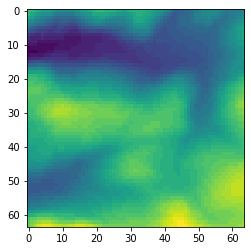

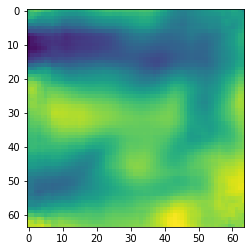

In [1701]:
img = dataset[200]
x = img.cuda()
plt.imshow(img.view(64, 64))
plt.show()
output = net(x.view(-1, 1, 64, 64))
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()

In [1702]:
#torch.save(net.state_dict(), './conv_autoencoder_save')

In [29]:
net.load_state_dict(torch.load('./conv_autoencoder_save'))

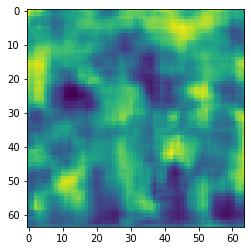

In [1696]:
code = torch.rand(1, 4, 8, 8).cuda()
output = net.decode(code)
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()